<a href="https://colab.research.google.com/github/Srishti013/Machine-Learning/blob/main/Supervised_learning/Logistic_Regression/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Exploratory data analysis

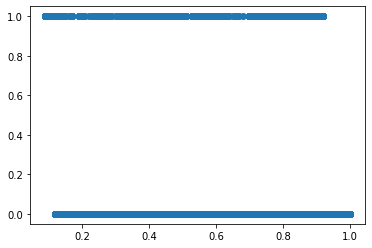

In [3]:
plt.scatter(df['satisfaction_level'],df['left'])

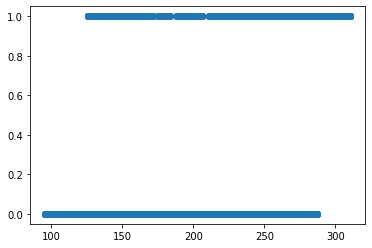

In [4]:
plt.scatter(df['average_montly_hours'],df['left'])

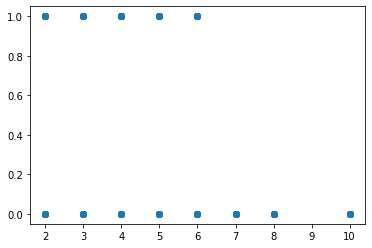

In [5]:
plt.scatter(df['time_spend_company'],df['left'])

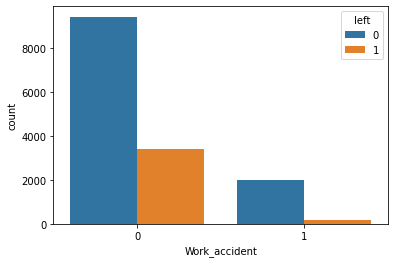

In [33]:
sns.countplot(x='Work_accident',hue='left',data=df)

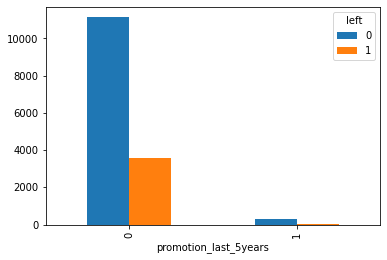

In [34]:
pd.crosstab(df['promotion_last_5years'],df['left']).plot(kind='bar')

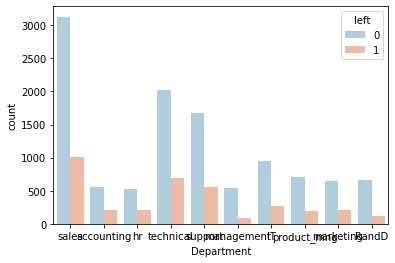

In [10]:
sns.countplot(x="Department",hue="left",data=df,palette="RdBu_r")

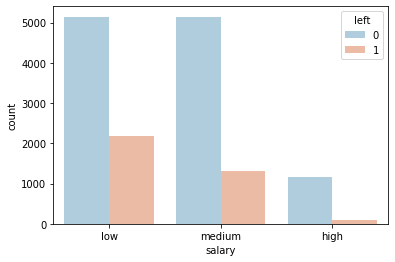

In [12]:
sns.countplot(x="salary",hue="left",data=df,palette="RdBu_r")

# Data Preprocessing

In [14]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [16]:
dummies = pd.get_dummies(df['Department'])
dummies = dummies.drop(['IT'],axis=1)    
dummies   

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,1,0


In [17]:
dummies1 = pd.get_dummies(df['salary'])
dummies1 = dummies1.drop(['medium'],axis=1)     
dummies1                

,high,low
0,0,1
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
14994,0,1
14995,0,1
14996,0,1
14997,0,1


In [24]:
df = pd.concat([df,dummies,dummies1],axis=1)
df = df.drop(['Department','salary'],axis=1)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,RandD,accounting,...,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [26]:
X=df.drop(['left'],axis=1)
y=df['left']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [30]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [31]:
model.score(X_test,y_test)

0.7897777777777778